# Tuberculosis Classification via X-Rays CNN 2

# Final Framework

1. Importing all necessary functions

2. Dataset
  - Defining variables
  - Importing dataset
  - Visualising dataset
  - Prefetching dataset

3. Model
  - Defining model
  - Initialising model
  - Training and validating model

4. Reporting results

# 1. Importing all necessary functions

In [ ]:
# to mount google drive

from google.colab.drive import mount

# to generate dataset

from tensorflow.keras.preprocessing import image_dataset_from_directory

# to augment dataset

from tensorflow.keras import Sequential
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip

# to visualize dataset

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# to build model

from tensorflow.keras import Input
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model

# to view model

from tensorflow.keras.utils import plot_model

# to define callbacks

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

# to compile model

from tensorflow.keras.optimizers import Adam

# 2. Dataset

Defining variables

In [ ]:
image_size = (256, 256)
batch_size = 32
epochs = 100

Importing dataset

In [ ]:
# mounting drive

mount('/content/drive')

# creating training and validation data

train_ds = image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/x_ray_tb/data/train" ,
    validation_split = 0.2 ,
    subset = "training",
    seed = 1337,
    image_size = image_size ,
    batch_size = batch_size ,   
)

val_ds = image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/x_ray_tb/data/train" ,
    validation_split = 0.2 ,
    subset = "validation",
    seed = 1337,
    image_size = image_size ,
    batch_size = batch_size ,     
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 718 files belonging to 2 classes.
Using 575 files for training.
Found 718 files belonging to 2 classes.
Using 143 files for validation.


Visualising dataset

Normal


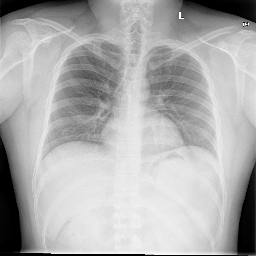

Tuberculosis


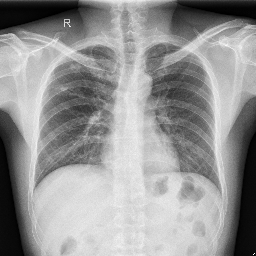

In [ ]:
# Load an color image in grayscale

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/x_ray_tb/data/train/normal/AISHOPWY.png',0)
print('Normal')
cv2_imshow(cv2.resize(img, image_size))

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/x_ray_tb/data/train/tb/AANPRUIV.png',0)
print('Tuberculosis')
cv2_imshow(cv2.resize(img, image_size))

Prefetching dataset

In [ ]:
train_ds = train_ds.prefetch(buffer_size = batch_size)
val_ds = val_ds.prefetch(buffer_size = batch_size)

# 3. Model

Defining model

In [ ]:
# function to make model

def make_model(input_shape):
  inputs = Input(shape = input_shape)
  x = Rescaling(1.0 / 255)(inputs)
  
  # first conv block
  
  x = Conv2D(filters=32, 
                    kernel_size=3, 
                    padding='same', 
                    activation='relu')(x)
  x = MaxPool2D()(x)
  
  # second conv block
  
  x = Conv2D(filters=64, 
                    kernel_size=3, 
                    padding='same', 
                    activation='relu')(x)
  x = MaxPool2D()(x)

  # third conv block

  x = Conv2D(filters=128, 
                    kernel_size=3, 
                    padding='same', 
                    activation='relu')(x)
  x = MaxPool2D()(x)

  # fourth conv block
  
  x = Conv2D(filters=128, 
                    kernel_size=3, 
                    padding='same', 
                    activation='relu')(x)
  x = MaxPool2D()(x)
  
  # fully connected layer
  
  x = Flatten()(x)
  x = Dropout(rate=0.5)(x)
  x = Dense(units=512, 
                   activation='relu')(x)
  
  outputs = Dense(units=1, activation = "sigmoid")(x)
  
  return Model(inputs, outputs)


Initialising model

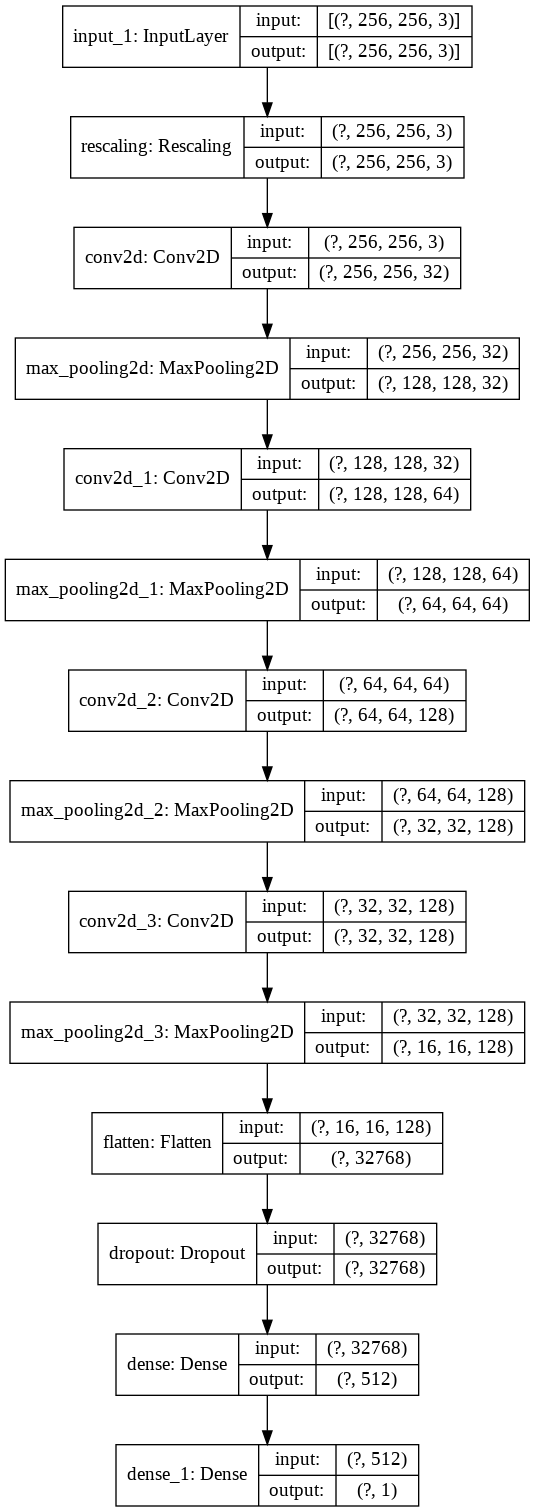

In [ ]:
# making a model

model = make_model(input_shape = image_size + (3,))

# viewing model

plot_model(
    model, 
    show_shapes = True
    )

Training and validating model

In [ ]:
# setting callbacks

callbacks = [
             ReduceLROnPlateau(
                 monitor='val_loss', 
                 factor=0.2, 
                 patience=5, 
                 mode='max', 
                 verbose=1
                 ),
             EarlyStopping(
                 monitor='val_loss', 
                 min_delta=0.01, 
                 patience=5,
                 mode='min', 
                 verbose=1
                 )
             ]

# compiling model

model.compile(
    optimizer = Adam(1e-3),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
    )

# training and validating

model.fit(
    train_ds, 
    epochs=epochs, 
    callbacks=callbacks, 
    validation_data=val_ds
    )

Epoch 1/100
18/18 [==============================] - 260s 14s/step - loss: 0.9982 - accuracy: 0.5217 - val_loss: 0.6963 - val_accuracy: 0.4615
Epoch 2/100
18/18 [==============================] - 85s 5s/step - loss: 0.6595 - accuracy: 0.6122 - val_loss: 0.6752 - val_accuracy: 0.4615
Epoch 3/100
18/18 [==============================] - 85s 5s/step - loss: 0.5530 - accuracy: 0.7217 - val_loss: 0.4270 - val_accuracy: 0.7832
Epoch 4/100
18/18 [==============================] - 86s 5s/step - loss: 0.4963 - accuracy: 0.7913 - val_loss: 0.3940 - val_accuracy: 0.8322
Epoch 5/100
18/18 [==============================] - 85s 5s/step - loss: 0.4857 - accuracy: 0.7687 - val_loss: 0.4983 - val_accuracy: 0.7762
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 0.4435 - accuracy: 0.8017
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
18/18 [==============================] - 86s 5s/step - loss: 0.4435 - accuracy: 0.8017 - val_loss: 0.4088 - val_accur